In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_excel('premiums_young_with_gr.xlsx')
print(df.shape)

(20096, 14)


In [4]:
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4


In [5]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

#### Removing, Like there is some of variables/Features having white spaces

In [6]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
# df.columns = df.columns.str.strip().str.lower().str.replace(r'\s+', '_', regex=True)

In [7]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


### Checking Null Values in Data and Dropping these Values

In [8]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [9]:
df.dropna(inplace = True)
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [10]:
df.shape

(20090, 14)

In [11]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [12]:
df[df.number_of_dependants<0]['number_of_dependants'].unique()

array([-3, -1], dtype=int64)

In [13]:
df['number_of_dependants'] = abs(df['number_of_dependants'])
df.number_of_dependants.describe()

count    20090.000000
mean         0.722598
std          0.937200
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: number_of_dependants, dtype: float64

In [14]:
numeric_col = df.select_dtypes(['float64', 'int64']).columns
numeric_col

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

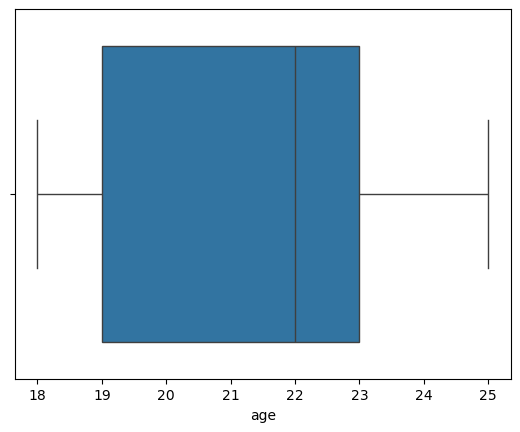

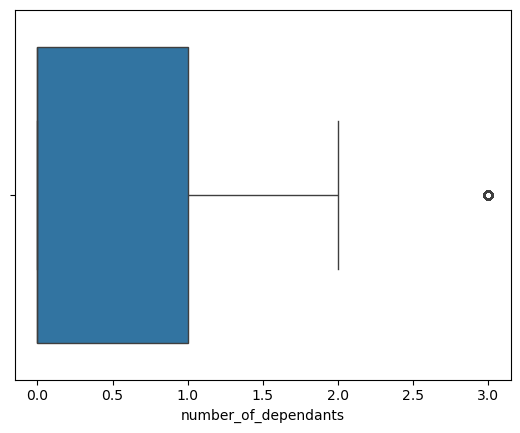

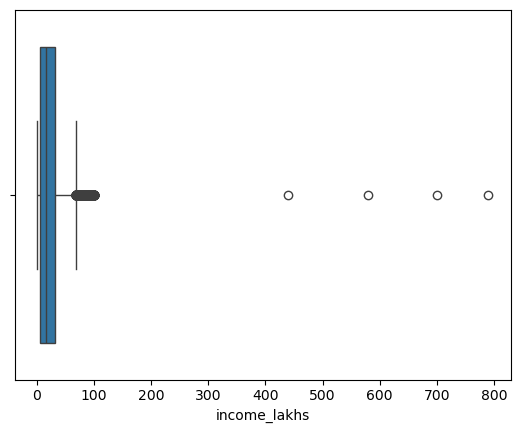

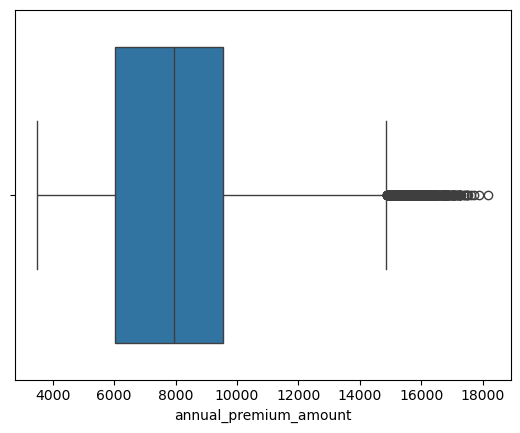

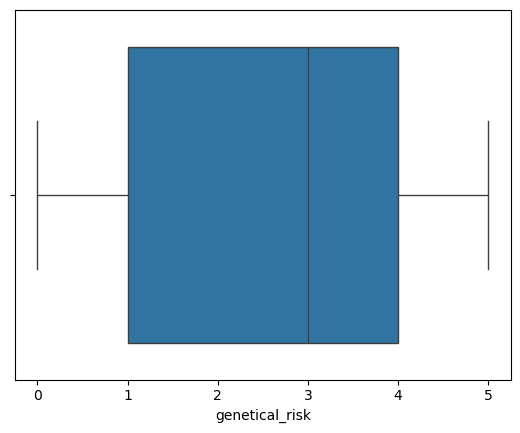

In [15]:
for c in  numeric_col:
    sns.boxplot(x = df[c])
    plt.show()

### Lets start outliers Treatment

In [16]:
df[df.age>100]['age'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64

In [17]:
df1 = df[df.age<=100].copy()
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [18]:
def getting_iqr_bounds(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3-Q1
    lower_bound = Q1-1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [19]:
getting_iqr_bounds(df1.income_lakhs)

(-31.5, 68.5)

In [20]:
quantile_thresold = df1.income_lakhs.quantile(0.999)
quantile_thresold

100.0

In [21]:
df2 = df1[df1.income_lakhs<= quantile_thresold].copy()
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


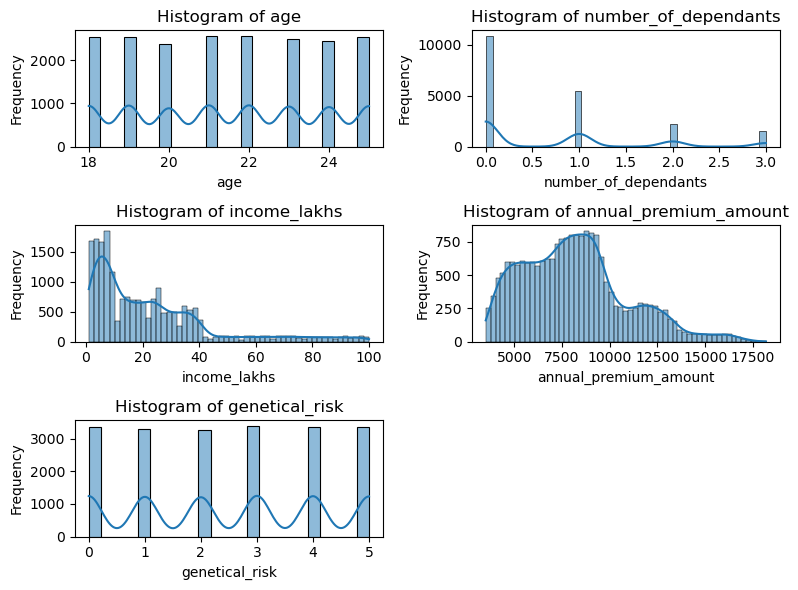

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming numeric_col is a list of numeric columns in df2
num_cols = len(numeric_col)  # Number of numeric columns
fig, axes = plt.subplots(3, 2, figsize=(8, 6))  # Create a 3x2 grid of subplots
axes = axes.ravel()  # Flatten the grid into a 1D array for easy iteration

# Loop through each numeric column and plot
for i, col in enumerate(numeric_col):
    sns.histplot(df2[col], kde=True, ax=axes[i])  # Plot on the i-th subplot
    axes[i].set_title(f'Histogram of {col}')  # Add a title
    axes[i].set_xlabel(col)  # Label the x-axis
    axes[i].set_ylabel('Frequency')  # Label the y-axis

# Hide any unused subplot spaces if there are fewer than 6 columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()# Display all subplots

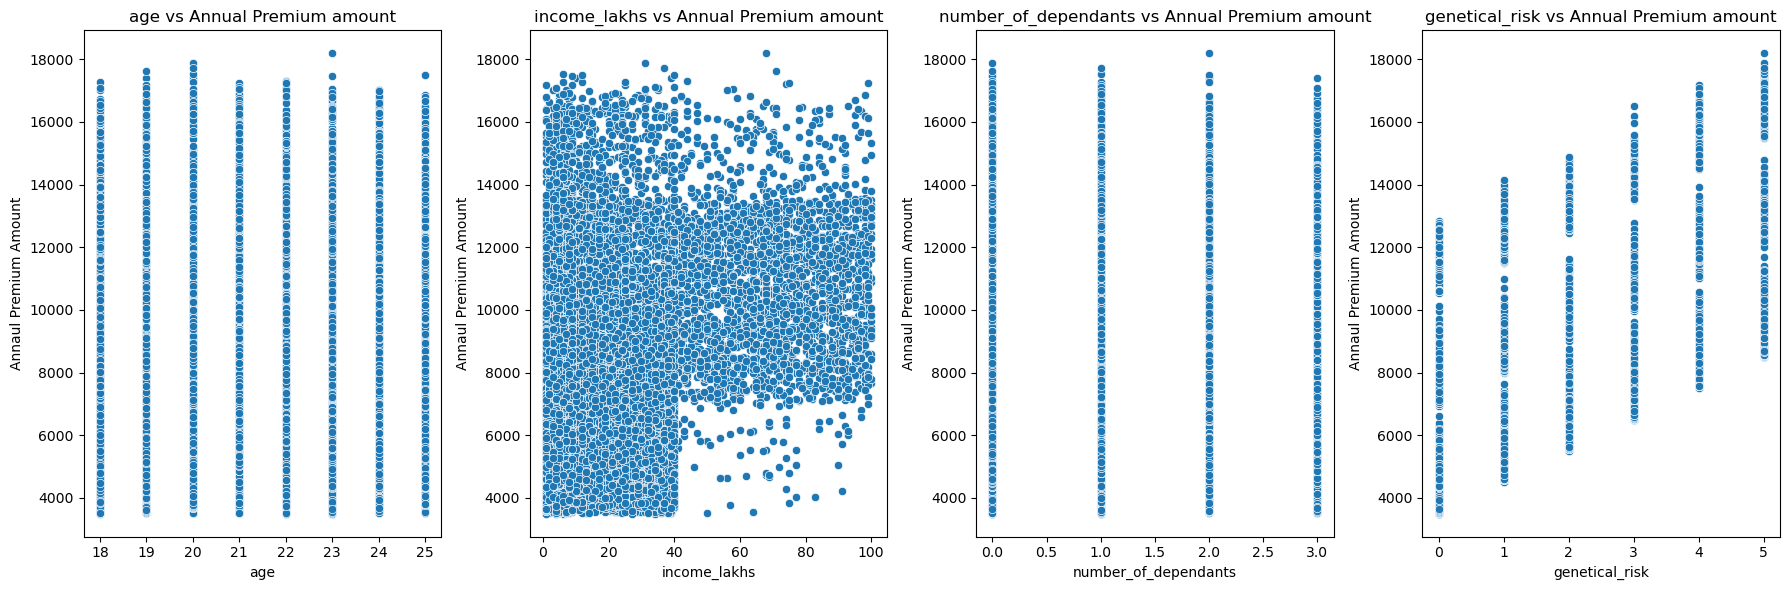

In [23]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants','genetical_risk']

fig, axes  = plt.subplots(1, len(numeric_features), figsize = (18,6))

for ax, column in zip(axes, numeric_features):
    sns.scatterplot(x = df2[column], y = df2['annual_premium_amount'],ax = ax)
    ax.set_title(f'{column} vs Annual Premium amount')
    ax.set_xlabel(column)
    ax.set_ylabel('Annaul Premium Amount')

plt.tight_layout()
plt.show()

In [24]:
categorical_columns = df2.select_dtypes(include=['object', 'category'])
categorical_columns.columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [25]:
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

gender: ['Male' 'Female']
region: ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status: ['Unmarried' 'Married']
bmi_category: ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status: ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status: ['Self-Employed' 'Freelancer' 'Salaried']
income_level: ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history: ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan: ['Silver' 'Bronze' 'Gold']


In [26]:
df2['smoking_status'].replace({
    'Smoking=0': 'No Smoking',
    'Does Not Smoke' : 'No Smoking',
    'Not Smoking' : 'No Smoking'
  },inplace = True)
df2['smoking_status'].unique()

C:\Users\mohsi\AppData\Local\Temp\ipykernel_12296\2802896140.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({


array(['Regular', 'No Smoking', 'Occasional'], dtype=object)

In [27]:
pctg_count = df2['gender'].value_counts(normalize = True)
pctg_count

gender
Male      0.550383
Female    0.449617
Name: proportion, dtype: float64

<Axes: xlabel='gender'>

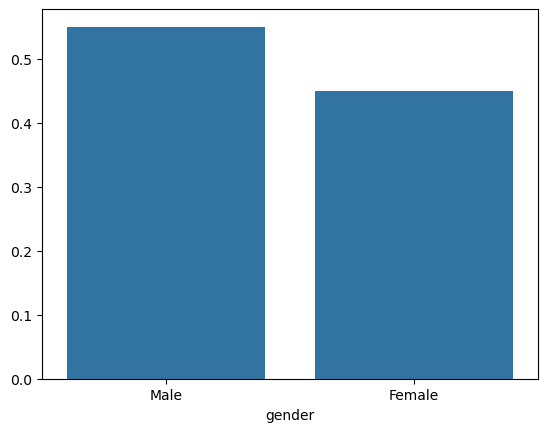

In [28]:
sns.barplot(x = pctg_count.index, y = pctg_count.values)

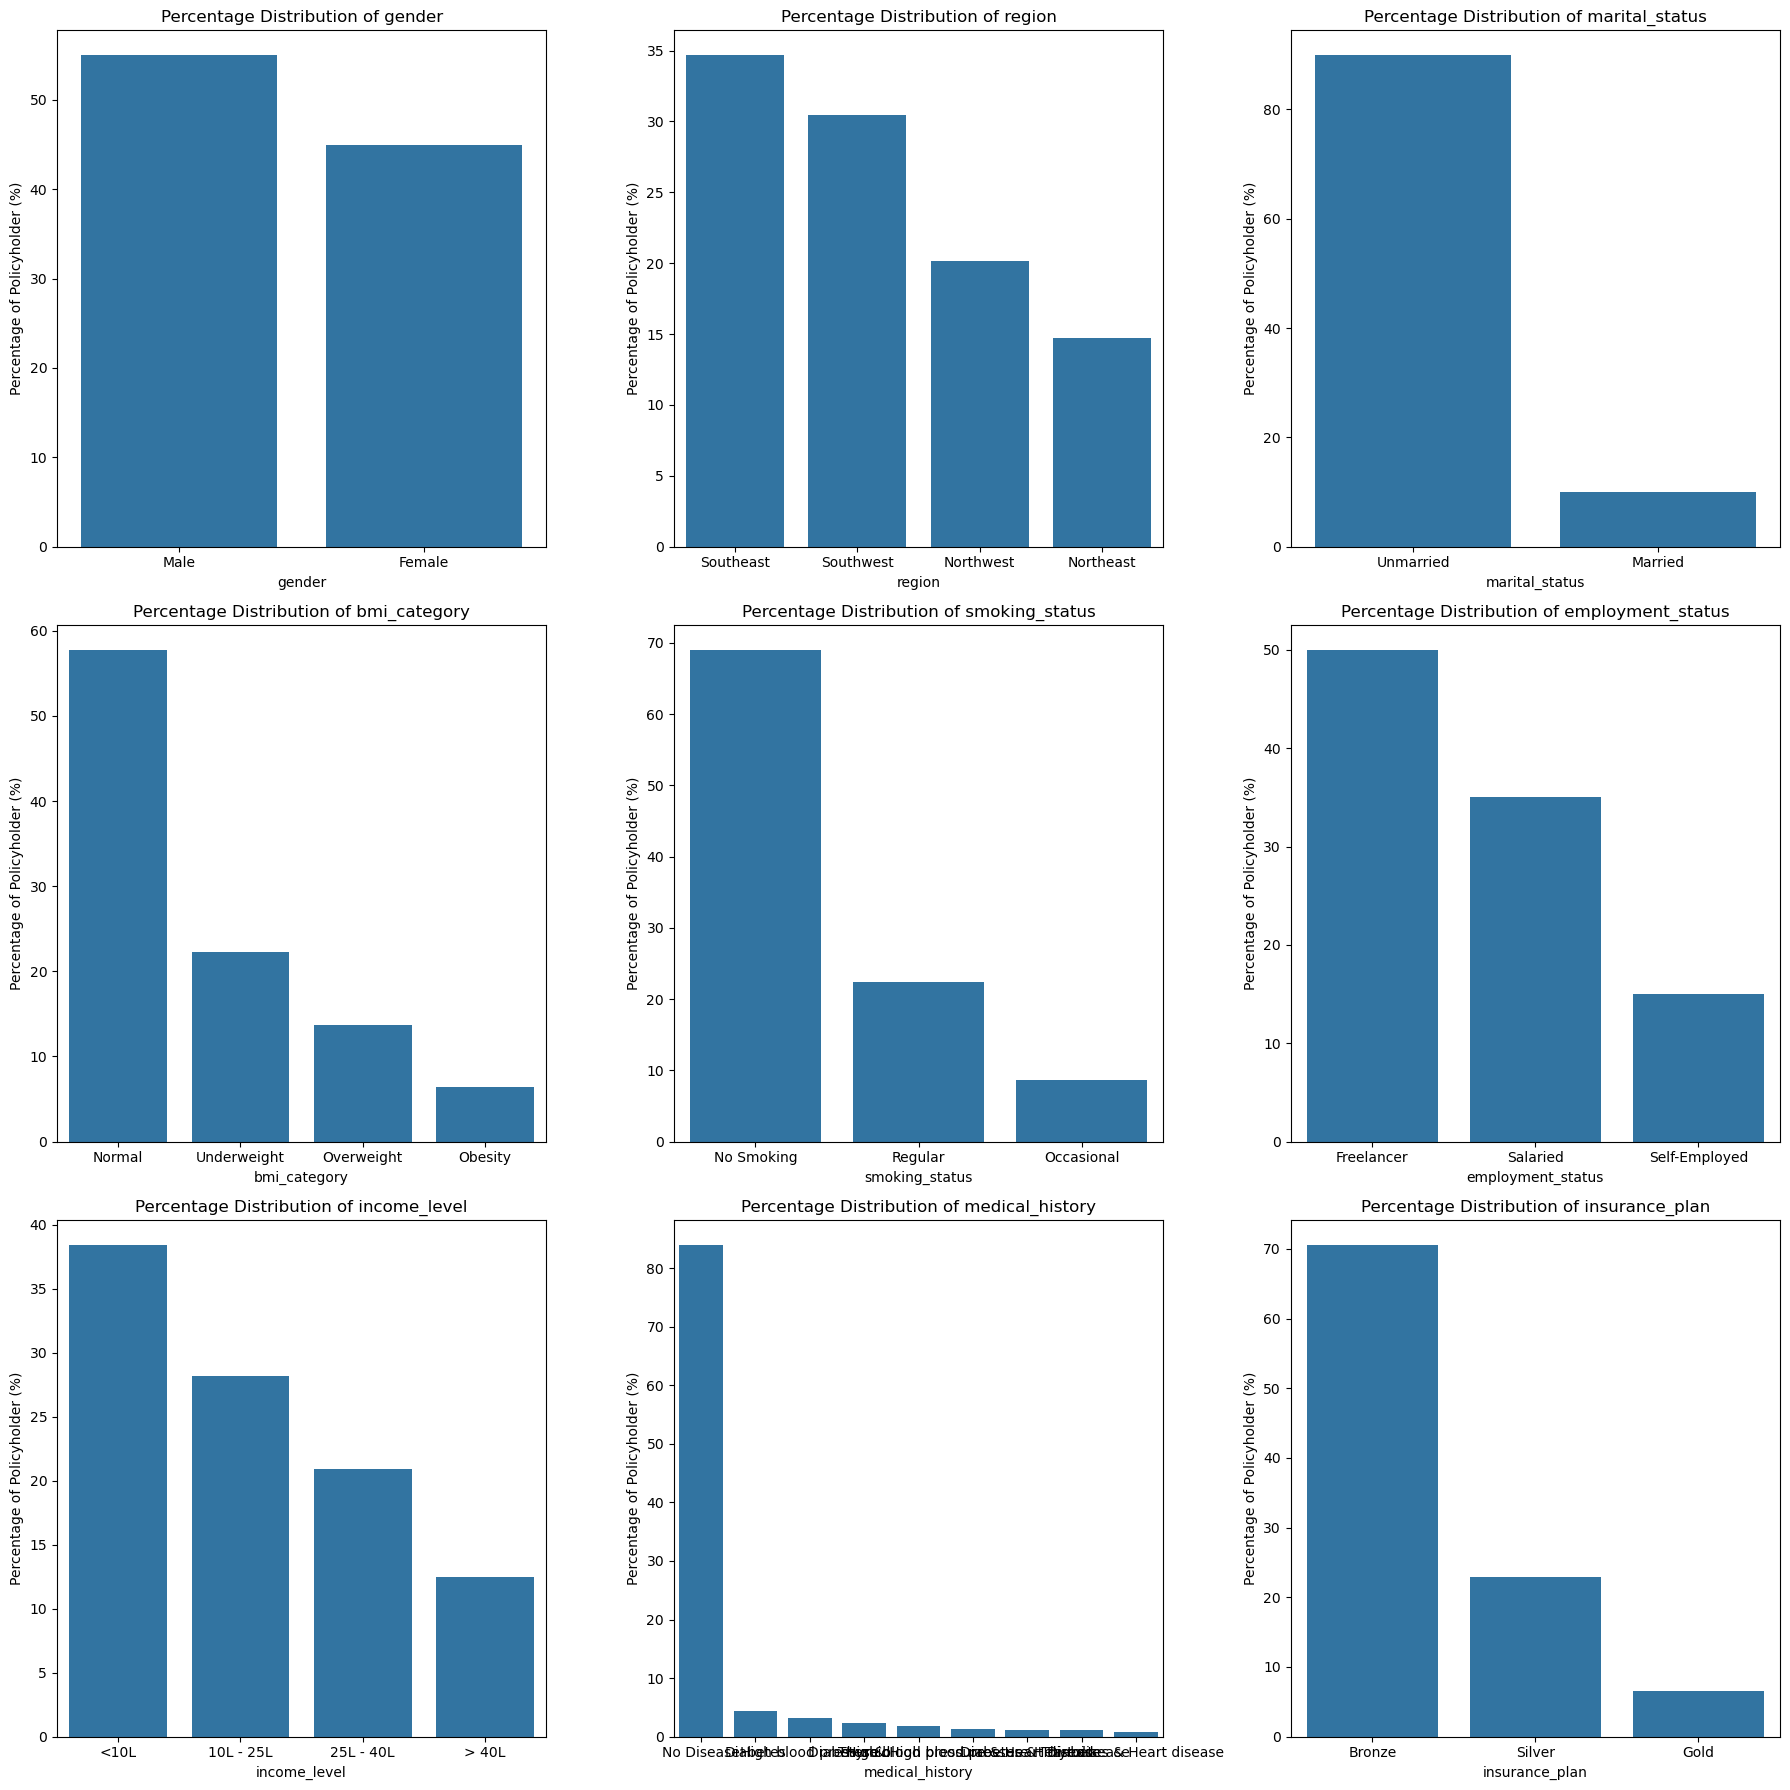

In [29]:
fig, axes  = plt.subplots(3, 3,figsize = (18,18))
axes  = axes.flatten()

for ax , column in zip(axes , categorical_columns):
    category_counts = df2[column].value_counts(normalize = True) * 100
    sns.barplot(x =category_counts.index , y = category_counts.values, ax = ax)
    ax.set_title(f'Percentage Distribution of {column}')
    ax.set_ylabel('Percentage of Policyholder (%)')
    ax.set_xlabel(column)
plt.tight_layout()
plt.show()


insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4508   326     828
25L - 40L         3382   209     608
<10L              6172   404    1145
> 40L              115   366    2023


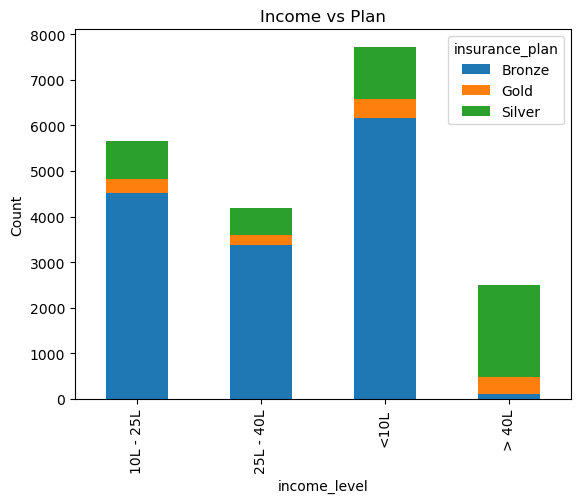

In [30]:
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print(crosstab)

crosstab.plot(kind = "bar", stacked = True )
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [31]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3


In [32]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [33]:
# According Medical hostory column having Kind of Diseases, we will have to convert these diseases into numbers
# If the person will have higher number of diseases premier will be higher 
# So we will assgin some risk score according to business told us

risk_score = {
    "diabetes":6,
    "heart disease":8,
    "high blood pressure": 6,
    "thyroid": 5,
    "no disease": 0,
    "none": 0
}

# We have to seperate out the multiple diseases 
# if the person will have multiple diseases his risk score will sum 

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand = True ).apply(lambda x : x.str.lower())
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,no disease,None
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,no disease,None
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,no disease,None


In [34]:
df2['disease1'].fillna('none', inplace = True)
df2['disease2'].fillna('none', inplace = True)
df2['total_risk_score'] = 0

for disease in ['disease1','disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_score)
    
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

C:\Users\mohsi\AppData\Local\Temp\ipykernel_12296\1294052834.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none', inplace = True)
C:\Users\mohsi\AppData\Local\Temp\ipykernel_12296\1294052834.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,no disease,none,0,0.000000


In [35]:
df2.insurance_plan.unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [36]:
df2['income_level'].unique() 

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [37]:
# This is an ordinal Category like Bronze < Silver < Gold  So will just Label Encoding
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
df2.insurance_plan.unique()

array([2, 1, 3], dtype=int64)

In [38]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L':2, '> 40L':3, '25L - 40L':4})
df2.head(3)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,3,99,High blood pressure,2,13365,4,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,3,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,3,97,No Disease,2,11857,4,no disease,none,0,0.000000


#### So Remaining Column are nominal So we will OneHotEncoding On those

In [39]:
nominal_cols = ['gender', 'region', 'marital_status','bmi_category', 'smoking_status','employment_status']
df3 = pd.get_dummies(df2, columns = nominal_cols, drop_first = True, dtype = int)
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,disease1,disease2,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,High blood pressure,2,13365,4,high blood pressure,none,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,no disease,none,...,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,No Disease,2,11857,4,no disease,none,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,2,no disease,none,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,1,no disease,none,...,1,0,1,0,1,0,0,0,0,0


In [40]:
df4 = df3.drop(['medical_history', 'disease1', 'disease2'],axis = 1)
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,total_risk_score,normalized_risk_score,gender_Male,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,3,99,2,13365,4,6,0.428571,1,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0,0.000000,0,...,0,0,1,0,0,1,0,0,0,0
2,21,0,3,97,2,11857,4,0,0.000000,0,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0,0.000000,1,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0,0.000000,1,...,1,0,1,0,1,0,0,0,0,0


#### Some Co-Relation Analysis between some columns

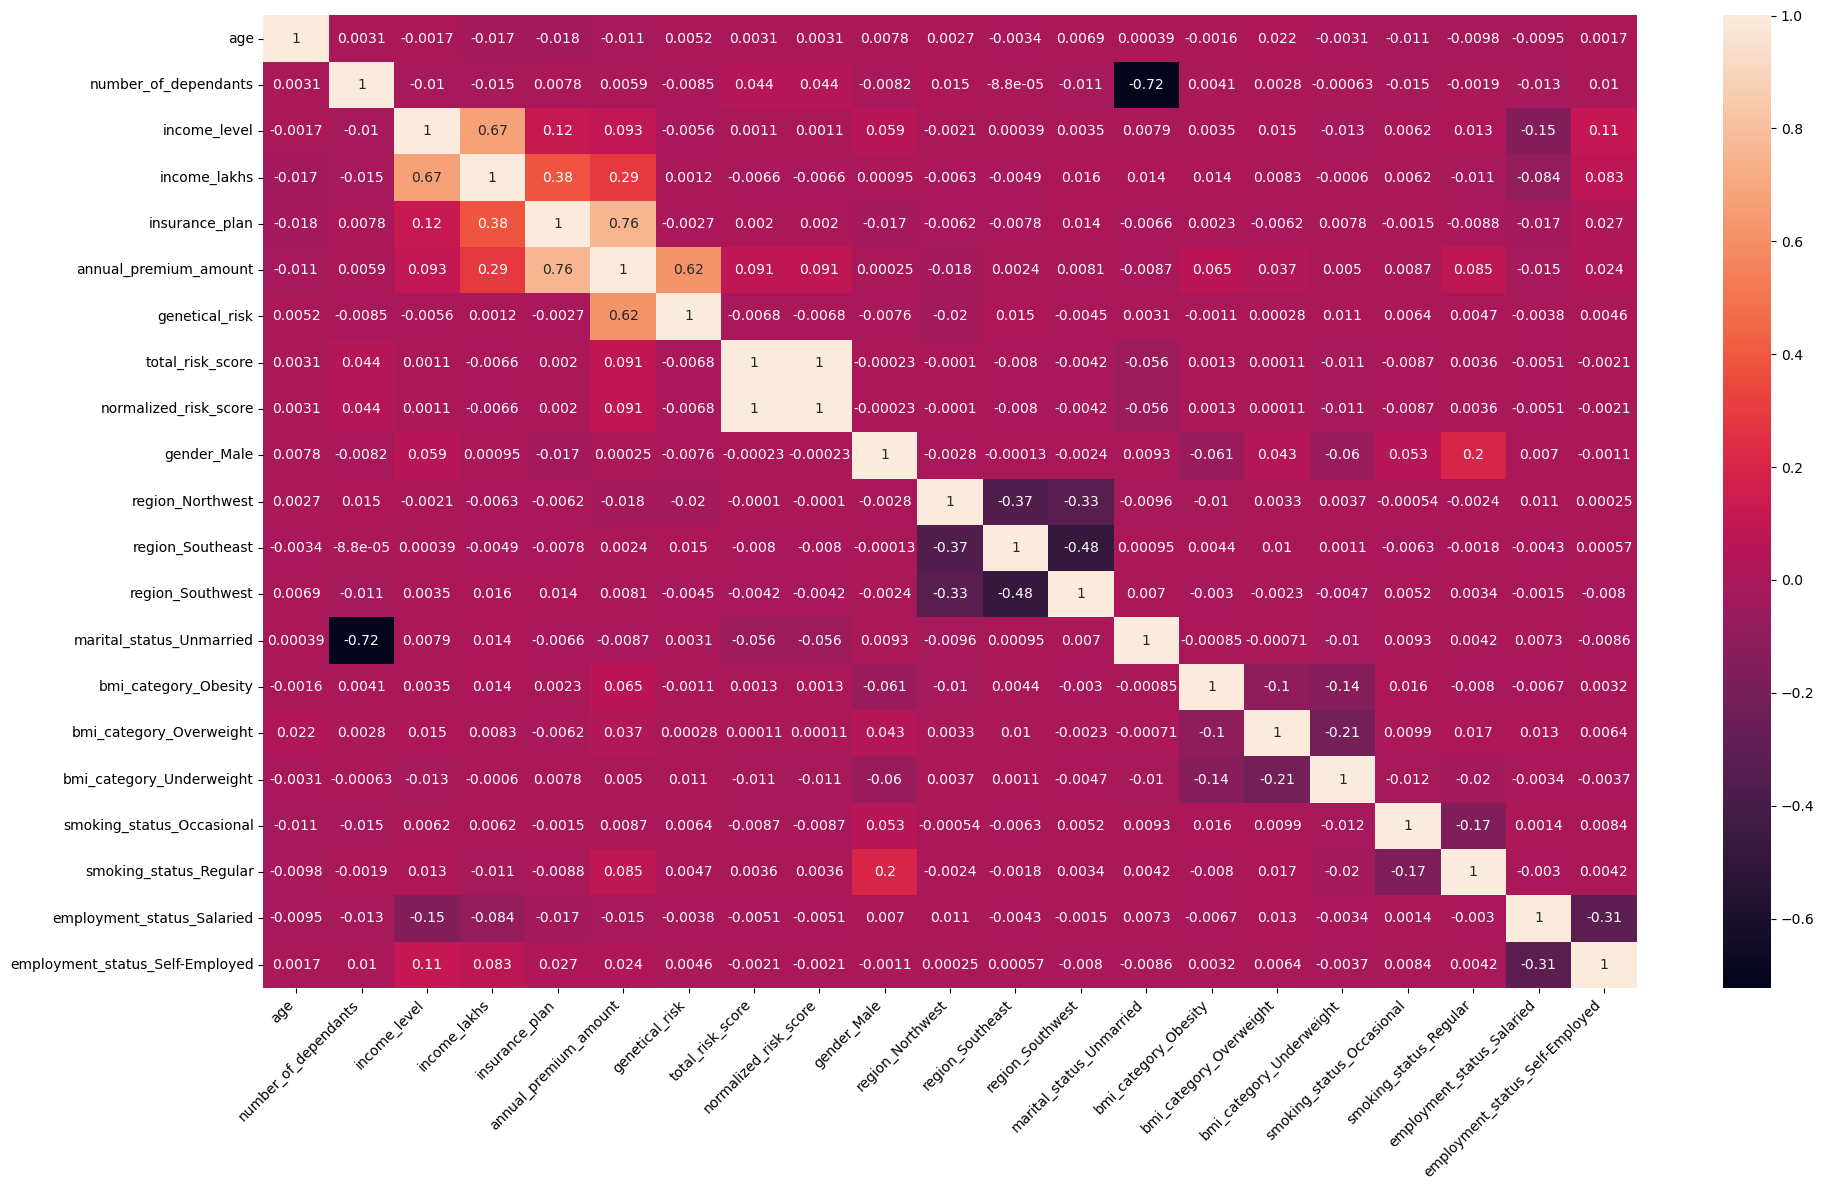

In [41]:
cm = df4.corr()

plt.figure(figsize = (20,12))
sns.heatmap(cm, annot = True)
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

#### Feature selection Based on Co-Relation

In [42]:
X = df4.drop('annual_premium_amount', axis = 'columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan','genetical_risk']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,total_risk_score,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.386123,0.216064,0.179578,0.500777,1.289057,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.383007,0.219516,0.300051,0.342037,3.220220,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [44]:
calculate_vif(X)

C:\Users\mohsi\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,3.155837
1,number_of_dependants,1.936584
2,income_level,3.916214
3,income_lakhs,4.344741
4,insurance_plan,1.647600
5,genetical_risk,2.981440
6,total_risk_score,inf
7,normalized_risk_score,inf
8,gender_Male,2.318870
9,region_Northwest,2.155017


In [45]:
X_reduced = X.drop('income_level', axis = 'columns')
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,total_risk_score,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.8,6,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.6,0,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.8,0,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.4,0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.2,0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [46]:
### Now We will Start model training, Our Data is ready for Training model

## Model Training

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y , test_size=0.3, random_state=10)
print("x train: ", X_train.shape)
print("X test: " ,X_test.shape)
print("y train: ",y_train.shape)
print("y test: ", y_test.shape)

x train:  (14060, 19)
X test:  (6026, 19)
y train:  (14060,)
y test:  (6026,)


## Applying Linear Regression

In [48]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
model_lr.score(X_test, y_test)

0.9887263253056615

In [49]:
#Checking both train and test score whether over model may getting overfitting
# If both the score will same then model will overfitting free 
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)

train_score, test_score

(0.988297900194864, 0.9887263253056615)

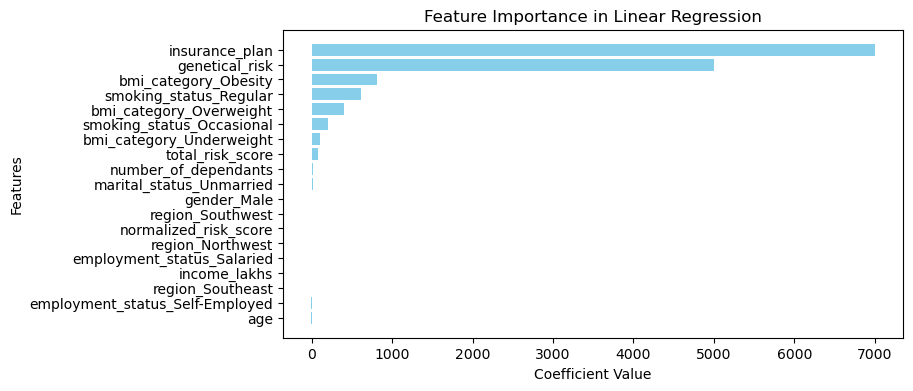

In [50]:
# By checking Feature impotance we will see how every feature have weight in prediction
feature_importance = model_lr.coef_
coef_df  = pd.DataFrame(feature_importance, index = X_test.columns, columns = ['Coefficients'])
coef_df = coef_df.sort_values(by = 'Coefficients', ascending = True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [51]:
from sklearn.linear_model import Ridge

# Initialize the Ridge model
model_ridge = Ridge(alpha=1.0)  # alpha is the regularization strength

# Fit the model
model_ridge.fit(X_train, y_train)

# Calculate scores
train_score_ridge = model_ridge.score(X_train, y_train)
test_score_ridge = model_ridge.score(X_test, y_test)

train_score_ridge, test_score_ridge

(0.988297310664513, 0.9887280428660091)

In [52]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model
model_lasso = Lasso(alpha=1.0)  # alpha is the regularization strength

# Fit the model
model_lasso.fit(X_train, y_train)

# Calculate scores
train_score_lasso = model_lasso.score(X_train, y_train)
test_score_lasso = model_lasso.score(X_test, y_test)

train_score_lasso, test_score_lasso

(0.9882818969997692, 0.9887455229987433)

In [53]:
!pip install xgboost

In [54]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBRegressor model
model_xgb = XGBRegressor(
    objective='reg:squarederror',  # Objective function for regression
    n_estimators=100,              # Number of boosting rounds (trees)
    learning_rate=0.1,             # Learning rate
    max_depth=3,                   # Maximum depth of a tree
    subsample=0.8,                 # Fraction of samples used for training each tree
    colsample_bytree=0.8,          # Fraction of features used for training each tree
    random_state=42                # Random seed for reproducibility
)

# Fit the model
model_xgb.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

# Evaluate the model
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

train_score, test_score

(0.9886768460273743, 0.9887644648551941)

In [55]:
y_pred = model_xgb.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print("XGBoost Regression ===> MSE: ", mse_lr, rmse_lr )

XGBoost Regression ===> MSE:  85442.24961150046 292.3050625827416


In [56]:
from sklearn.model_selection import RandomizedSearchCV

model_xgb = XGBRegressor()

param_grid = {
    'n_estimators': [20,40,50],
    'learning_rate': [0.01,0.1,0.2],
    'max_depth': [3,4,5]
}

random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter = 10, cv = 3, scoring = 'r2', random_state=42)

random_search.fit(X_train, y_train)
random_search.best_score_

0.9879226088523865

In [57]:
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [58]:
best_model  = random_search.best_estimator_

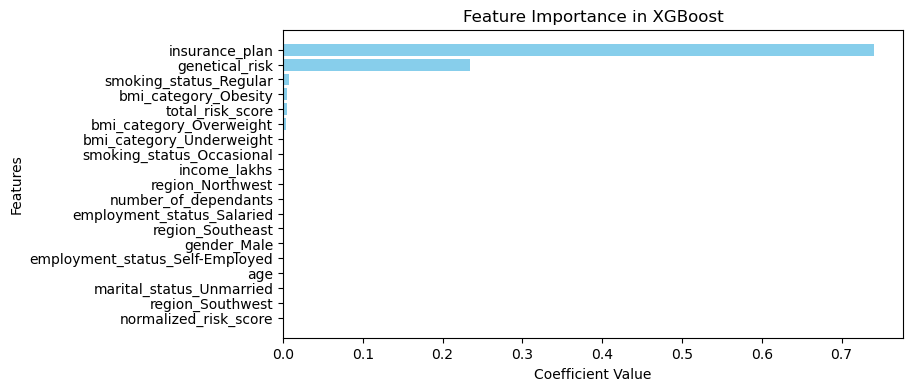

In [59]:
# By checking Feature impotance we will see how every feature have weight in prediction
feature_importances = best_model.feature_importances_
coef_df  = pd.DataFrame(feature_importances, index = X_test.columns, columns = ['Coefficients'])
coef_df = coef_df.sort_values(by = 'Coefficients', ascending = True)

plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='skyblue')
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost")
plt.show()

## Error Analysis

In [60]:
y_pred = best_model.predict(X_test)

residual = y_pred - y_test
residual_pct = residual*100/ y_test

results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'difference': residual,
    'diff_pct': residual_pct
})

results_df.head()

,actual,predicted,difference,diff_pct
12774,6238,6104.117676,-133.882324,-2.146238
14758,9462,9593.652344,131.652344,1.391380
13205,5152,5619.506348,467.506348,9.074269
14278,6988,7377.886230,389.886230,5.579368
19351,4917,5109.857422,192.857422,3.922258


<Axes: xlabel='diff_pct', ylabel='Count'>

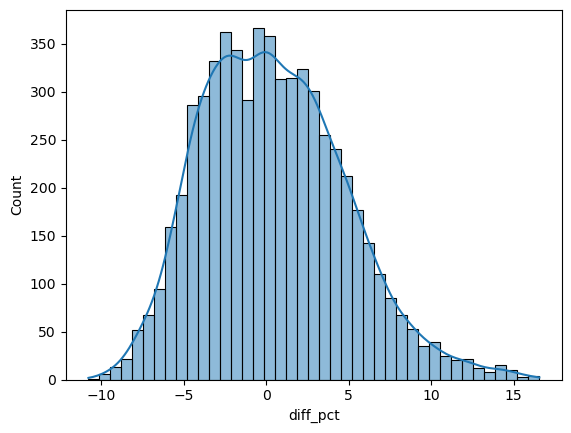

In [61]:
sns.histplot(results_df['diff_pct'], kde = True)

In [62]:
# Checking how much Records having Error more than 10% 

extreme_error_threshold = 10

extreme_results_df = results_df[np.abs(results_df.diff_pct)>extreme_error_threshold]
extreme_results_df.shape

(150, 4)

In [63]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

2.489213408562894

In [64]:
results_df[np.abs(results_df.diff_pct)>50].sort_values('diff_pct', ascending=False)

,actual,predicted,difference,diff_pct


In [65]:
X_test.index

Index([12774, 14758, 13205, 14278, 19351, 10622, 16391, 14799, 17184, 16348,
       ...
        8695,  9658, 14195,  1365,   399, 17652,  5807, 10298, 13316,  2583],
      dtype='int64', length=6026)

In [66]:
extreme_results_df.index

Index([12669,  2918, 17084,  7181, 12285, 13476, 15481,  2948,  4919, 16466,
       ...
       11094, 12103,  1986, 16062, 17811,  8008,  9714, 11971,   711,  1534],
      dtype='int64', length=150)

In [68]:
extreme_error_df = X_test.loc[extreme_results_df.index]

In [69]:
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,total_risk_score,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
12669,0.857143,0.000000,0.000000,0.0,0.0,0,0.0,1,0,1,0,1,0,1,0,0,0,1,0
2918,0.285714,0.000000,0.151515,0.0,0.2,0,0.0,1,1,0,0,1,0,0,0,0,0,1,0
17084,1.000000,0.000000,0.353535,0.0,0.0,0,0.0,1,0,0,0,1,0,0,0,0,0,0,0
7181,0.571429,0.000000,0.161616,0.0,0.0,0,0.0,1,0,0,1,1,0,0,0,0,0,0,0
12285,0.428571,0.333333,0.232323,0.0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0


## Export Model

In [72]:
from joblib import dump
dump(best_model, "App/artifacts/model_young.joblib")

scaler_with_cols = {
    'scaler':scaler,
    'cols_to_scale': cols_to_scale
}
dump(scaler_with_cols, "App/artifacts/scaler_young.joblib")

['App/artifacts/scaler_young.joblib']